<a href="https://colab.research.google.com/github/Chintan3627/objectdetaction_model_using_ylov7/blob/main/objectdetect_using_yolo_8_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.1/605.1 kB 10.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.23M/6.23M [00:00<00:00, 23.1MB/s]
Ultralytics YOLOv8.0.144 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 476k/476k [00:00<00:00, 75.1MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 106.1ms
Speed: 15.3ms preprocess, 106.1ms inference, 36.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [ ]:
!pwd

/content


In [ ]:
!yolo task=segment mode= predict model=yolov8n-seg.pt source='/content/bus.jpg'

100% 6.73M/6.73M [00:00<00:00, 21.0MB/s]
Ultralytics YOLOv8.0.144 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients

image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 125.0ms
Speed: 3.6ms preprocess, 125.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-seg.pt")

In [ ]:
# model.predict(source="/content/bus.jpg")


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 237.5ms
Speed: 3.8ms preprocess, 237.5ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes', 'masks']
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54:

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
!curl -L "https://github.com/entbappy/YOLO-v8-Object-Detection/blob/main/data.zip" > data.zip; unzip data.zip; rm data.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4396  100  4396    0     0  10206      0 --:--:-- --:--:-- --:--:-- 10199
Archive:  data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data.zip or
        data.zip.zip, and cannot find data.zip.ZIP, period.


In [22]:
import zipfile

# Replace 'your_zip_file.zip' with the name of your uploaded zip file
zip_file_name = '/content/drive/MyDrive/data.zip'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()


In [28]:
!yolo task=detect  mode=train model=/content/yolov8n.pt data= /content/data/data.yaml epochs=25 imgsz=224 plots=True


Ultralytics YOLOv8.0.144 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/data/data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynami

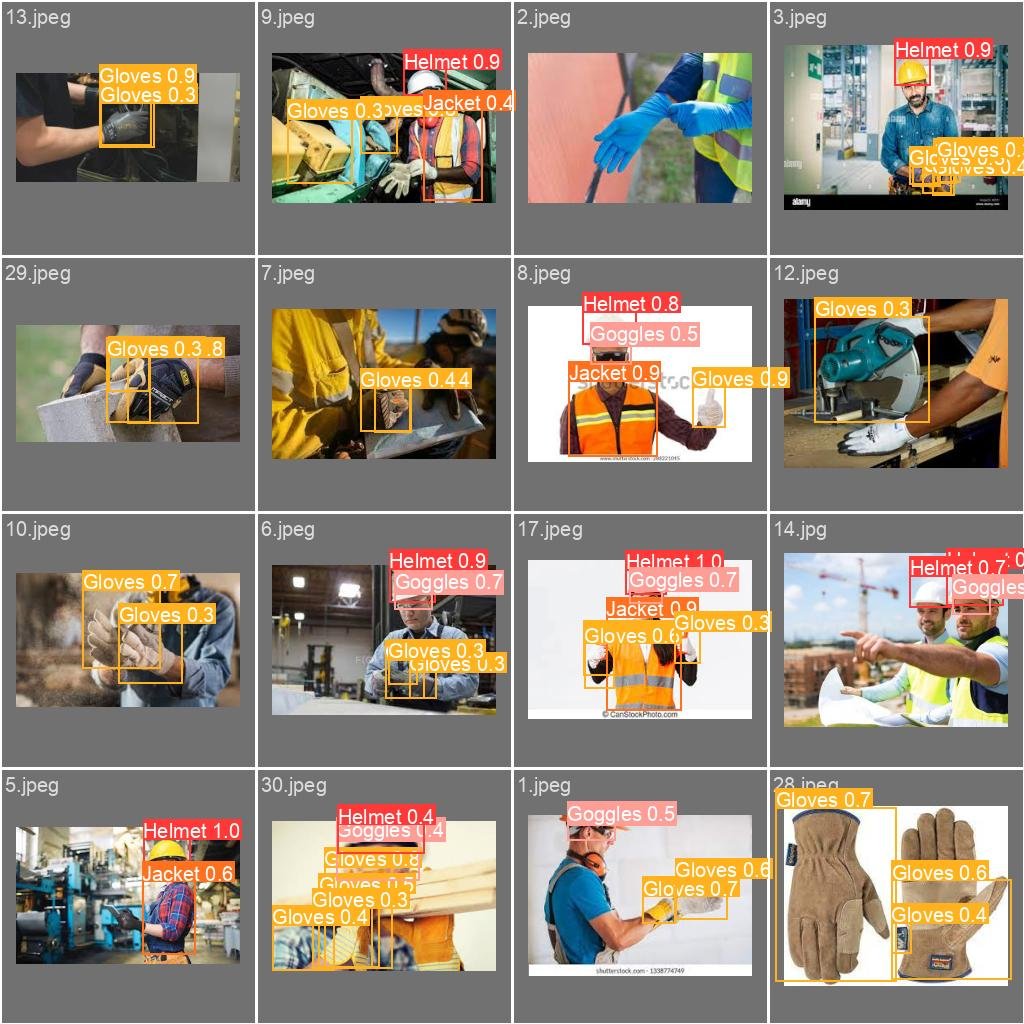

In [30]:
from IPython.display import Image

Image(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=600)
